# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys
api_keys = "6a412549f2f2c04b58f49ca4c281ee51"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "Desktop/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# Create empty data frame and add columns: city, country, latitude and longitude
cities_data = pd.DataFrame()
cities_data["City"] = ""
cities_data["Country"] = ""

# Generate numbers for latitude and longitude and loop through the data
cities_data["Lat"] = np.random.uniform(low=-90.000, high=90.000, size=1500)
cities_data["Lng"] = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Use latitude and longitude to find city and country by using interrows and citipy
for index, row in cities_data.iterrows():
    lat = row["Lat"]
    lng = row["Lng"]
    cities_data.set_value(index, "City", citipy.nearest_city(lat, lng).city_name)
    cities_data.set_value(index, "Country", citipy.nearest_city(lat, lng).country_code)
    
# Delete duplicate cities and reset index
cities_data = cities_data.drop_duplicates(["City", "Country"])
cities_data = cities_data.reset_index()

# Update city and country data in the data column
cities_data = cities_data[["City", "Country", "Lat", "Lng"]]

cities_data.head()

/Users/choiwa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/choiwa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


,City,Country,Lat,Lng
0,channel-port aux basques,ca,47.616567,-60.281277
1,kavieng,pg,11.736154,157.002204
2,cape town,za,-45.745409,7.221346
3,aksu,cn,40.813629,78.926377
4,saint-philippe,re,-59.110288,69.638188


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create an empty column for city weather data
cities_data["Cloudiness"] = ""
cities_data["Date"] = ""
cities_data["Humidity"] = ""
cities_data["Max Temp"] = ""
cities_data["Wind Speed"] = ""

# Counter
row_count = 1
sets = 1

print("Beginning Data Retrieval")
print("---------------------------")

# Loop through and run openweahter find data for the empty column
for index, row in cities_data.iterrows():
    # Create endpoint url
    params = {
    "q": cities_data.loc[index]["City"],
    "units": "IMPERIAL",
    "mode": "json",
    "appid": api_keys}
    
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    
    try:
        # Run a request to grab the JSON at the base URL
        city_respond = requests.get(base_url, params=params).json()
        
        print(f"Processing Record {row_count} of set {sets} | {row['City']}")
        
        # Update row counter
        row_count += 1 
    
        #retrieve weather data from cities response
        city_cloud = city_respond['clouds']['all']
        city_date = city_respond['dt']
        city_hum = city_respond['main']['humidity']
        city_max = city_respond['main']['temp_max']
        city_wind = city_respond['wind']['speed']
        
       # Add retrieved data into cities_list data frame
        cities_data.set_value(index, "Cloudiness", city_cloud)
        cities_data.set_value(index, "Date", city_date)
        cities_data.set_value(index, "Humidity", city_hum)
        cities_data.set_value(index, "Max Temp", city_max)
        cities_data.set_value(index, "Wind Speed", city_wind)

    except:
        print("City not found. Skipping...")
        continue 
    
    if row_count == 51:
        row_count = 1
        sets = sets + 1 

Beginning Data Retrieval
---------------------------
Processing Record 1 of set 1 | channel-port aux basques
Processing Record 2 of set 1 | kavieng


/Users/choiwa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/choiwa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/choiwa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/choiwa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/choiwa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] acc

Processing Record 3 of set 1 | cape town
Processing Record 4 of set 1 | aksu
Processing Record 5 of set 1 | saint-philippe
Processing Record 6 of set 1 | naze
Processing Record 7 of set 1 | vaini
Processing Record 8 of set 1 | mecca
Processing Record 9 of set 1 | ushuaia
Processing Record 10 of set 1 | butaritari
Processing Record 11 of set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 12 of set 1 | waipawa
Processing Record 13 of set 1 | punta arenas
Processing Record 14 of set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of set 1 | jamestown
Processing Record 16 of set 1 | valleyview
Processing Record 17 of set 1 | puerto ayora
Processing Record 18 of set 1 | udachnyy
Processing Record 19 of set 1 | castro
Processing Record 20 of set 1 | lasa
Processing Record 21 of set 1 | san isidro
Processing Record 22 of set 1 | arraial do cabo
Processing Record 23 of set 1 | palasa
City not found. Skipping...
Processing Record 24 of set 1 | konstantinovo
Pr

Processing Record 37 of set 4 | ingham
Processing Record 38 of set 4 | porec
Processing Record 39 of set 4 | seymchan
Processing Record 40 of set 4 | charters towers
Processing Record 41 of set 4 | moree
Processing Record 42 of set 4 | dolni bojanovice
Processing Record 43 of set 4 | pryyutivka
Processing Record 44 of set 4 | henties bay
Processing Record 45 of set 4 | gweta
Processing Record 46 of set 4 | port hawkesbury
Processing Record 47 of set 4 | san policarpo
Processing Record 48 of set 4 | fakel
Processing Record 49 of set 4 | ilulissat
Processing Record 50 of set 4 | aguada de cima
Processing Record 1 of set 5 | viligili
City not found. Skipping...
Processing Record 2 of set 5 | katsuura
Processing Record 3 of set 5 | sept-iles
Processing Record 4 of set 5 | whithorn
Processing Record 5 of set 5 | zlatoustovsk
City not found. Skipping...
Processing Record 6 of set 5 | tuatapere
Processing Record 7 of set 5 | monclova
Processing Record 8 of set 5 | pevek
Processing Record 9 of

Processing Record 20 of set 8 | krasnosilka
Processing Record 21 of set 8 | oeiras
Processing Record 22 of set 8 | scarborough
Processing Record 23 of set 8 | houma
Processing Record 24 of set 8 | lovozero
Processing Record 25 of set 8 | lapeer
Processing Record 26 of set 8 | kulhudhuffushi
Processing Record 27 of set 8 | kloulklubed
Processing Record 28 of set 8 | elko
Processing Record 29 of set 8 | nagato
Processing Record 30 of set 8 | ca mau
Processing Record 31 of set 8 | yamada
Processing Record 32 of set 8 | plettenberg bay
Processing Record 33 of set 8 | the valley
Processing Record 34 of set 8 | san quintin
Processing Record 35 of set 8 | mus
Processing Record 36 of set 8 | sagone
Processing Record 37 of set 8 | norman wells
Processing Record 38 of set 8 | fare
Processing Record 39 of set 8 | taltal
Processing Record 40 of set 8 | hobyo
Processing Record 41 of set 8 | zambezi
Processing Record 42 of set 8 | weligama
Processing Record 43 of set 8 | jinchengjiang
City not found

Processing Record 2 of set 12 | vardo
Processing Record 3 of set 12 | togur
Processing Record 4 of set 12 | shieli
Processing Record 5 of set 12 | mount gambier
Processing Record 6 of set 12 | batagay-alyta
Processing Record 7 of set 12 | iracoubo
Processing Record 8 of set 12 | virginia beach
Processing Record 9 of set 12 | kirovskiy
Processing Record 10 of set 12 | daru
Processing Record 11 of set 12 | scottsburgh
City not found. Skipping...
Processing Record 12 of set 12 | severnyy
City not found. Skipping...
Processing Record 13 of set 12 | tabuk
Processing Record 14 of set 12 | saint-augustin
Processing Record 15 of set 12 | krasnyy chikoy
Processing Record 16 of set 12 | neyshabur
Processing Record 17 of set 12 | bucerias
Processing Record 18 of set 12 | puerto escondido
Processing Record 19 of set 12 | tocopilla
Processing Record 20 of set 12 | nosy varika
Processing Record 21 of set 12 | keuruu
Processing Record 22 of set 12 | ugoofaaru
Processing Record 23 of set 12 | fagersta

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Save the DataFrame as a csv
cities_data.to_csv("weatherpy.csv", encoding="utf-8", index=False)

In [6]:
# Display the City Data Frame
weather_data = cities_data
weather_data.head(30)

,City,Country,Lat,Lng,Cloudiness,Date,Humidity,Max Temp,Wind Speed
0,channel-port aux basques,ca,47.616567,-60.281277,48,1544322666,100,29.42,23.29
1,kavieng,pg,11.736154,157.002204,44,1544322235,100,84.09,6.62
2,cape town,za,-45.745409,7.221346,0,1544320800,82,59,8.05
3,aksu,cn,40.813629,78.926377,0,1544320800,70,-0.41,11.18
4,saint-philippe,re,-59.110288,69.638188,90,1544320800,85,15.8,3.36
5,naze,jp,22.147177,139.608454,44,1544322667,93,72.66,3.71
6,vaini,to,-48.951271,-175.063101,32,1544320800,93,66.2,3.15
7,mecca,sa,20.254910,41.259491,0,1544322665,78,48.5,2.71
8,ushuaia,ar,-58.563169,-49.228548,75,1544320800,61,48.2,23.04
9,butaritari,ki,14.528168,162.998387,12,1544322668,100,85.67,4.61


In [7]:
weather_data.count()

City          614
Country       614
Lat           614
Lng           614
Cloudiness    614
Date          614
Humidity      614
Max Temp      614
Wind Speed    614
dtype: int64

In [8]:
weather_data = weather_data.replace('', np.nan)
weather_data = weather_data.dropna()

In [9]:
weather_data.dtypes

City           object
Country        object
Lat           float64
Lng           float64
Cloudiness    float64
Date          float64
Humidity      float64
Max Temp      float64
Wind Speed    float64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

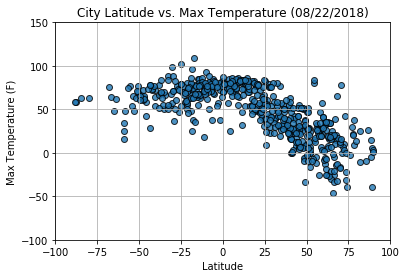

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data['Lat'], 
            weather_data['Max Temp'],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (08/22/2018)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-100, 150])

# Save the figure
plt.savefig("Max_Temp_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

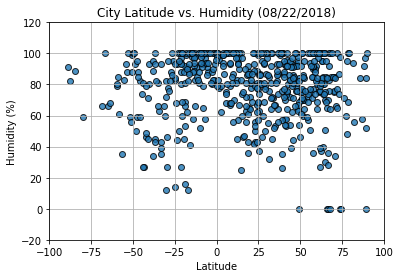

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data['Lat'], 
            weather_data['Humidity'],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (08/22/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-20, 120])

# Save the figure
plt.savefig("Humidity_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

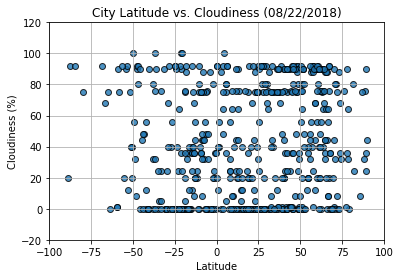

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data['Lat'], 
            weather_data['Cloudiness'],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (08/22/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-20, 120])

# Save the figure
plt.savefig("Cloudiness_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

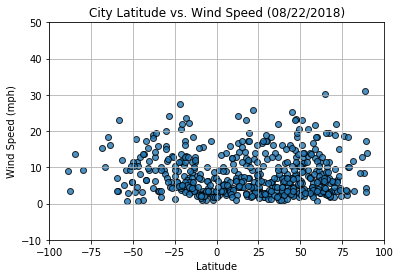

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data['Lat'], 
            weather_data['Wind Speed'],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (08/22/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("Wind_Speed_Latitude.png")

# Show plot
plt.show()